## Frozen Lake Domain Description

Frozen Lake is a simple grid-world environment where an agent navigates a frozen lake to reach a goal while avoiding falling into holes. The environment is represented as a grid, with each cell being one of the following:

* **S**: Starting position of the agent
* **F**: Frozen surface, safe to walk on
* **H**: Hole, falling into one ends the episode with a reward of 0
* **G**: Goal, reaching it ends the episode with a reward of 1

The agent can take four actions:

* **0: Left**
* **1: Down**
* **2: Right**
* **3: Up**

However, due to the slippery nature of the ice, the agent might not always move in the intended direction. There's a chance it moves perpendicular to the intended direction.




The transition model for the Frozen Lake world describes how the agent's actions affect its movement and the resulting state transitions. Here's a breakdown of the key components:

**Actions:**

* The agent can choose from four actions:
    * 0: Left
    * 1: Down
    * 2: Right
    * 3: Up

**State Transitions:**

* **Intended Movement:** Ideally, the agent moves one cell in the chosen direction.
* **Slippery Ice:** Due to the slippery nature of the ice, there's a probability that the agent will move in a perpendicular direction instead of the intended one. The exact probabilities depend on the specific Frozen Lake environment configuration, but typically:
    * **Successful Move:** The agent moves in the intended direction with a high probability.
    * **Perpendicular Move:** The agent moves 90 degrees to the left or right of the intended direction with a lower probability.
* **Boundaries:** If the intended movement would take the agent outside the grid boundaries, it remains in its current position.
* **Holes:** If the agent lands on a hole ("H"), the episode ends, and it receives a reward of 0.
* **Goal:** If the agent reaches the goal ("G"), the episode ends, and it receives a reward of 1.




In [8]:
env = gym.make('FrozenLake-v1', render_mode="human", is_slippery=True)
print ("State 14 Going Left: (Prob, s', r, Done)", env.P[14][0]) # a = Left
print ("State 14 Going Down: (Prob, s', r, Done)", env.P[14][1]) # a = Down
print ("State 14 Going Right: (Prob, s', r, Done)", env.P[14][2]) # a = Right
print ("State 14 Going Up: (Prob, s', r, Done)", env.P[14][3]) # a = Up

State 14 Going Left: (Prob, s', r, Done) [(0.3333333333333333, 10, 0.0, False), (0.3333333333333333, 13, 0.0, False), (0.3333333333333333, 14, 0.0, False)]
State 14 Going Down: (Prob, s', r, Done) [(0.3333333333333333, 13, 0.0, False), (0.3333333333333333, 14, 0.0, False), (0.3333333333333333, 15, 1.0, True)]
State 14 Going Right: (Prob, s', r, Done) [(0.3333333333333333, 14, 0.0, False), (0.3333333333333333, 15, 1.0, True), (0.3333333333333333, 10, 0.0, False)]
State 14 Going Up: (Prob, s', r, Done) [(0.3333333333333333, 15, 1.0, True), (0.3333333333333333, 10, 0.0, False), (0.3333333333333333, 13, 0.0, False)]


c:\Users\dosan\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


# Q-Learning Algorithm

Q-Learning is a model-free reinforcement learning algorithm that finds the optimal policy by interacting with the environment.

It updates the Q-value (state-action value function) using the Bellman equation for Q-values. For the exercise, we use a discount factor (gamma = 0.99), a learning rate (alpha = 0.5), and ran it for a fixed number of episodes (num_episodes = 50000).

Additionally using **epsilon-greedy exploration strategy**, which balances **exploration** we start with epsilon of 1 so it explores a lot at the start and we decay with 0.99995 to a minimun of 0.01 by taking the max of whiever is greater max(min_epsilon, epsilon * epsilon_decay)

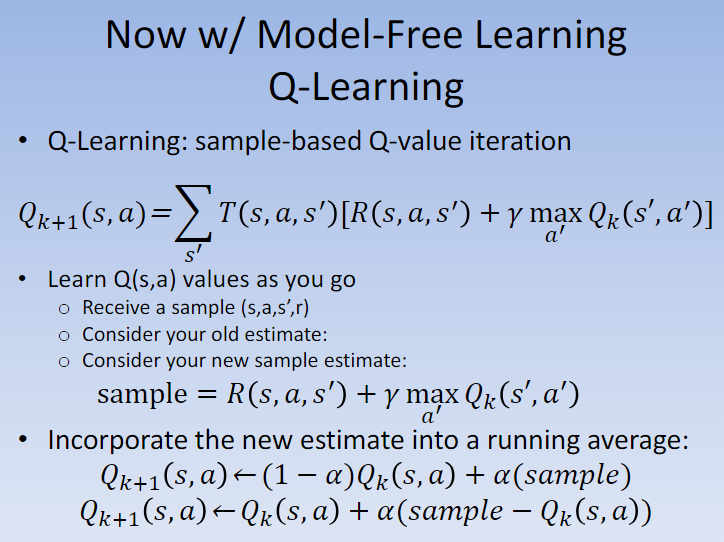

Steps:
- **Initialize** the Q-value function Q(s,a) for each state-action pair (s,a), often starting with zero for all states and actions.
- **Select actions** using an epsilon-greedy strategy, where with probability ϵ the agent explores a random action, and with 1 - ϵ it exploits the current best-known action.
- **Update the Q-value function** after taking each action using the following Q-Learning update rule:

    Q(s,a) = Q(s,a) + α[R(s,a,s') + γmax_aQ(s',a) - Q(s,a)]

    where R(s,a,s') is the reward received, and s' is the next state.

- **Repeat** the updates over multiple episodes until the Q-values converge, or until a sufficient number of episodes have been completed.
- **Extract the policy** from the Q-value function by choosing the action that maximizes the Q-value for each state:

    π*(s) = arg max_a  Q(s,a)


In [ ]:
import gymnasium as gym
import numpy as np
# best weights so far env, num_episodes=50000, alpha=0.5, gamma=0.99, epsilon=1.0, epsilon_decay=0.99995 , min_epsilon=0.01, max_steps=100
def q_learning(env, num_episodes=50000, alpha=0.5, gamma=0.99, epsilon=1.0, epsilon_decay=0.99995 , min_epsilon=0.01, max_steps=100):
    """
    Perform Q-learning to solve the FrozenLake environment.

    Parameters:
        env: Gymnasium environment (e.g., FrozenLake)
        num_episodes: Number of episodes to train
        alpha: Learning rate
        gamma: Discount factor (0 < gamma <= 1)
        epsilon: Exploration rate for ε-greedy policy
        epsilon_decay: Decay factor for epsilon after each episode
        min_epsilon: Minimum exploration rate
        max_steps: Maximum steps per episode.

    Returns:
        Q: Learned Q-table (state-action values)
        policy: Optimal policy derived from the Q-table
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    # Initialize Q-table (for state-action pairs)
    Q = np.zeros((n_states, n_actions))

    # Initialize policy
    policy = np.zeros(n_states, dtype=int)

    for episode in range(num_episodes):
        state, _ = env.reset()   # Reset environment and get initial state

        for step in range(max_steps):
            # Choose an action using ε-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = np.argmax(Q[state])  # Exploit: best known action, 
                # example: Q = [[0.2, 0.5, 0.1, 0.0],  # Q-values for state 0, np.argmax(Q[state]) returns 1, because the maximum value 0.5 is at index 1.
            
            # Take the action and observe the result
            next_state, reward, done, _, _ = env.step(action)

            # Update the Q-value using the Q-learning update formula
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            
            # Move to the next state
            state = next_state
            # Break in case of going to an exit state
            if done:
                break
        # Decay epsilon after each episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        # Debugging: Print progress every 1000 episodes
        """ if episode % 1000 == 0:
            print(f"Episode {episode}, Epsilon: {epsilon:.3f}")
            print(f"Q-table (sample):\n{Q[:4]}")  # Print sample of Q-table """

    # Extract policy from the Q-values
    for s in range(n_states):
        policy[s] = np.argmax(Q[s, :])  # Choose action with the highest Q-value
    
    # Extract Value function from Q-table (max Q-values)
    V = np.max(Q, axis=1)

    return Q, V, policy

In [63]:
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering

# Apply Q-learning
q_values, v_values, q_policy = q_learning(env)

# Display results
print(f"Q-Learning Policy: \n{q_policy.reshape((4,4))}")
print(f"Q-Learning Value Function: \n{np.round(v_values.reshape((4,4)), 2)}")
env.close()

Q-Learning Policy: 
[[0 3 3 3]
 [0 0 2 0]
 [3 1 0 0]
 [0 2 1 0]]
Q-Learning Value Function: 
[[0.6  0.4  0.39 0.38]
 [0.65 0.   0.34 0.  ]
 [0.69 0.76 0.87 0.  ]
 [0.   0.87 0.98 0.  ]]


In [67]:
# Evaluate student's solution (Optional)
def evaluate_policy(env, policy, num_episodes=100):
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy[state]
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
    return total_reward / num_episodes

# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering
env.reset(seed=3)

average_reward = evaluate_policy(env, q_policy)
print("Average Reward from Q-Learning Policy:", average_reward)

Average Reward from Q-Learning Policy: 0.89


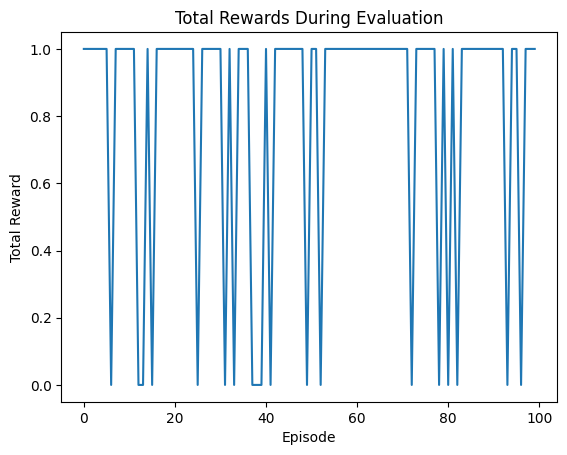

In [75]:
def evaluate_policy(env, policy, num_episodes=100, max_steps=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            action = policy[state]  # Use learned policy
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
            if done:
                break
        total_rewards.append(total_reward)
    return total_rewards
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering
env.reset(seed=3)

# Evaluate the learned policy
num_eval_episodes = 100
eval_rewards = evaluate_policy(env, q_policy, num_episodes=num_eval_episodes)

# Plot total rewards
import matplotlib.pyplot as plt

plt.plot(range(len(eval_rewards)), eval_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards During Evaluation")
plt.show()
env.close()

## Results

- **Q-Learning Optimal Value Function**: This represents the maximum expected cumulative reward for each state under the optimal policy.
- **Q-Learning Optimal Policy**: This represents the best action to take from each state to maximize cumulative rewards.
- **Q-Learning Average Reward**: We evaluated the resulting policy by simulating it for 100 episodes. The average reward indicates the performance of the policy on the environment.

In [76]:
print("Q-Learning Table Function:\n", np.round(q_values,2))
print("Q-Learning Optimal Value Function:\n", np.round(v_values.reshape((4,4)),2))
print("Q-Learning Optimal Policy:\n", q_policy.reshape((4,4)))
print("Q-Learning Average Reward:", average_reward)

Q-Learning Table Function:
 [[0.6  0.48 0.47 0.48]
 [0.36 0.11 0.24 0.4 ]
 [0.38 0.39 0.38 0.39]
 [0.1  0.01 0.15 0.38]
 [0.65 0.26 0.19 0.14]
 [0.   0.   0.   0.  ]
 [0.01 0.01 0.34 0.02]
 [0.   0.   0.   0.  ]
 [0.28 0.54 0.47 0.69]
 [0.13 0.76 0.02 0.49]
 [0.87 0.11 0.08 0.1 ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.64 0.2  0.87 0.31]
 [0.62 0.98 0.57 0.7 ]
 [0.   0.   0.   0.  ]]
Q-Learning Optimal Value Function:
 [[1.06 0.94 0.94 0.92]
 [1.08 0.92 1.04 0.92]
 [1.18 1.36 1.31 0.52]
 [0.31 1.34 1.61 0.94]]
Q-Learning Optimal Policy:
 [[0 3 3 3]
 [0 0 2 0]
 [3 1 0 0]
 [0 2 1 0]]
Q-Learning Average Reward: 0.11


# Agent playing the game using the Q-Learning policy

In [77]:
import gymnasium as gym
import numpy as np
# Create the environment
env = gym.make('FrozenLake-v1', render_mode="human", is_slippery=True)
#env = gym.make('FrozenLake-v1', render_mode="ansi", is_slippery=False)  # 'ansi' mode for text-based rendering

# Reset the environment to the initial state
observation, info = env.reset(seed=3)
policy = q_policy # [0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0] Policy from Q-Learning for best run
for _ in range(25):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(policy[observation])

    # Render the environment
    env.render()

    if terminated or truncated:
        observation, info = env.reset()
env.close()

# Approximate Q-Learning Algorithm

Approximate Q-Learning is a model-free reinforcement learning algorithm that uses a function approximator to estimate Q-values instead of a Q-table. It finds the optimal policy by iteratively adjusting the weights of the approximator based on observed rewards and state transitions.

It updates the Q-value (state-action value function) using the Bellman equation for Q-values. For the exercise, we use a discount factor (gamma = 0.99), a learning rate (alpha = 0.5), and ran it for a fixed number of episodes (num_episodes = 50000).

Additionally using **epsilon-greedy exploration strategy**, which balances **exploration** we start with epsilon of 1 so it explores a lot at the start and we decay with 0.99995 to a minimun of 0.01 by taking the max of whiever is greater max(min_epsilon, epsilon * epsilon_decay)

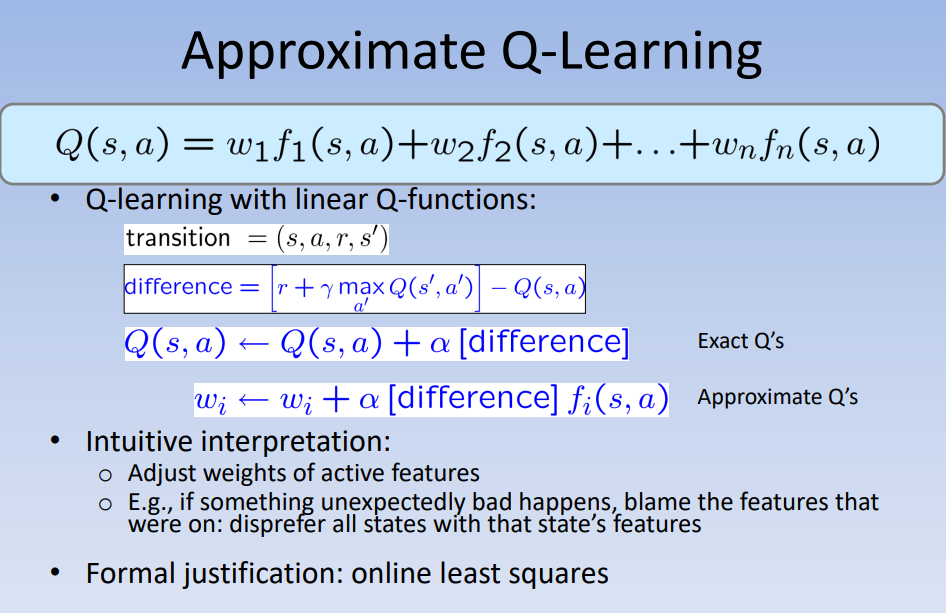

Steps:
- **Initialize the Weights** The function approximator is represented by a weight matrix 'w', initialized randomly or to small values. Each action has its own set of weights, corresponding to the features of the state space.

- **Select Actions Using Epsilon-Greedy** 
* For each state 's', select an action 'a':
    *  With probability ϵ, select a random action (explore).
    *  Otherwise, select the action that maximizes the approximated Q-value
- **Update the Weights** After taking an action 'a' and observing the reward 'r' and next state 's'', update the weights 'w' using the Temporal Difference (TD) update rule:

    TD Error (difference) = [r + γmax_a'Q(s',a')] - Q(s,a)
        w ← w + α * TD Error * f(s,a)
    This update minimizes the TD error [difference] by adjusting the weights 'w'

- **Repeat Over Episodes** the updates over multiple episodes until the Q-values converge, or until a sufficient number of episodes have been completed.
- **Policy Extraction** The optimal policy π*(s) is derived from the learned Q-value function by selecting the action with the highest estimated Q-value for each state:

    π*(s) = arg max_a  Q(s,a;w)

In [ ]:
import gymnasium as gym
import numpy as np
# best weights so far env, num_episodes=50000, alpha=0.5, gamma=0.99, epsilon=1.0, epsilon_decay=0.99995 , min_epsilon=0.01, max_steps=100
def approximate_q_learning(env, num_episodes=50000, alpha=0.5, gamma=0.99, epsilon=1.0, epsilon_decay=0.99995 , min_epsilon=0.01, max_steps=100):
    """
    Perform approximate Q-learning with a linear function approximator.

    Parameters:
        env: Gymnasium environment (e.g., FrozenLake)
        num_episodes: Number of episodes to train
        alpha: Learning rate
        gamma: Discount factor (0 < gamma <= 1)
        epsilon: Exploration rate for ε-greedy policy
        epsilon_decay: Decay factor for epsilon after each episode
        min_epsilon: Minimum exploration rate
        max_steps: Maximum steps per episode.

    Returns:
        weights: Learned weights for the linear function approximator.
        policy: Optimal policy derived from the weights.
        V: State-value function derived from the learned weights.
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    # Initialize policy
    policy = np.zeros(n_states, dtype=int)

    # Initialize weights for the linear approximator
    weights = np.random.rand(n_states, n_actions)

    def feature_vector(state):
        """Convert state to a feature vector (one-hot encoding)."""
        features = np.zeros(n_states)
        features[state] = 1
        return features

    def q_value(state, action):
        """Compute Q(s, a) using the linear function approximator."""
        features = feature_vector(state)
        return np.dot(features, weights[:, action])

    def best_action(state):
        """Return the action with the highest Q-value for a given state."""
        q_values = [q_value(state, a) for a in range(n_actions)]
        return np.argmax(q_values)

    def state_value(state):
        """Compute V(s) as max_a Q(s, a)."""
        q_values = [q_value(state, a) for a in range(n_actions)]
        return max(q_values)
    
    # Main loop
    for episode in range(num_episodes):
        state, _ = env.reset()   # Reset environment and get initial state

        for step in range(max_steps):
            # Choose an action using ε-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = best_action(state)  # Exploit: best known action, 
                # example: Q = [[0.2, 0.5, 0.1, 0.0],  # Q-values for state 0, np.argmax(Q[state]) returns 1, because the maximum value 0.5 is at index 1.
            
            # Take the action and observe the result
            next_state, reward, done, _, _ = env.step(action)

            # Compute the TD target
            best_next_action = best_action(next_state)
            td_target = reward + gamma * q_value(next_state, best_next_action)
            
            # Compute the TD error
            td_error = td_target - q_value(state, action)

            # Update weights
            features = feature_vector(state)
            weights[:, action] += alpha * td_error * features

            # Move to the next state
            state = next_state

            # Break in case of going to an exit state
            if done:
                break
        # Decay epsilon after each episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        # Debugging: Print progress every 1000 episodes
        """ if episode % 1000 == 0:
            print(f"Episode {episode}, Epsilon: {epsilon:.3f}")
            print(f"Q-table (sample):\n{Q[:4]}")  # Print sample of Q-table """

    # Extract policy from the learned weights
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        policy[s] = best_action(s)

    # Calculate V-values (state-value function)
    V = np.zeros(n_states)
    for s in range(n_states):
        V[s] = state_value(s)

    return weights, policy, V

In [74]:
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering

# Apply Approximate Q-learning
weights, policy, v_values = approximate_q_learning(env)

# Print the learned policy
print("Learned Policy Grid:")
print(policy.reshape((4, 4)))  # Assuming a 4x4 grid environment

Learned Policy Grid:
[[0 3 0 1]
 [0 3 2 1]
 [3 1 0 0]
 [0 2 2 0]]


In [ ]:
# Evaluate student's solution (Optional)
def evaluate_approx_policy(env, policy, num_episodes=100):
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy[state]
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
    return total_reward / num_episodes
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering
env.reset(seed=3)

average_reward = evaluate_approx_policy(env, policy)
print("Average Reward from  Approximate Q-Learning Policy:", average_reward)

Average Reward from Q-Learning Policy: 0.89


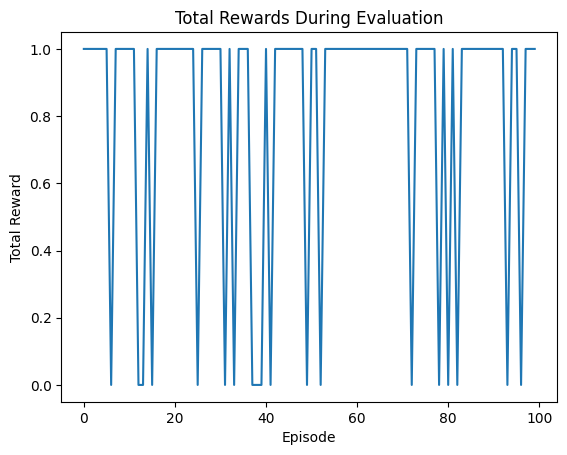

In [79]:
def evaluate_approx_policy(env, policy, num_episodes=100, max_steps=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            action = policy[state]  # Use learned policy
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
            if done:
                break
        total_rewards.append(total_reward)
    return total_rewards
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering
env.reset(seed=3)

# Evaluate the learned policy
num_eval_episodes = 100
eval_rewards = evaluate_approx_policy(env, policy, num_episodes=num_eval_episodes)

# Plot total rewards
import matplotlib.pyplot as plt

plt.plot(range(len(eval_rewards)), eval_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards During Evaluation")
plt.show()
env.close()

In [80]:
print("Approximate Q-Learning Optimal Table Function:\n", np.round(weights,2))
print("Approximate Q-Learning Optimal Value Function:\n", np.round(v_values.reshape((4,4)),2))
print("Approximate Q-Learning Optimal Policy:\n", policy.reshape((4,4)))
print("Approximate Q-Learning Average Reward:", average_reward)

Approximate Q-Learning Optimal Table Function:
 [[1.06 0.99 1.01 1.  ]
 [0.94 0.94 0.94 0.94]
 [0.94 0.93 0.93 0.94]
 [0.92 0.92 0.92 0.92]
 [1.08 0.98 1.08 1.04]
 [0.86 0.66 0.78 0.92]
 [0.92 0.92 1.04 0.92]
 [0.9  0.92 0.29 0.69]
 [0.46 0.73 0.83 1.18]
 [1.05 1.36 1.04 1.06]
 [1.31 0.92 0.59 1.06]
 [0.52 0.47 0.16 0.4 ]
 [0.31 0.15 0.03 0.31]
 [0.84 0.91 1.34 1.31]
 [1.51 1.59 1.61 1.51]
 [0.94 0.59 0.69 0.77]]
Approximate Q-Learning Optimal Value Function:
 [[1.06 0.94 0.94 0.92]
 [1.08 0.92 1.04 0.92]
 [1.18 1.36 1.31 0.52]
 [0.31 1.34 1.61 0.94]]
Approximate Q-Learning Optimal Policy:
 [[0 3 3 3]
 [0 0 2 0]
 [3 1 0 0]
 [0 2 1 0]]
Approximate Q-Learning Average Reward: 0.89


# Agent playing the game using the approximate Q-Learning policy

In [81]:
import gymnasium as gym
import numpy as np
# Create the environment
env = gym.make('FrozenLake-v1', render_mode="human", is_slippery=True)
#env = gym.make('FrozenLake-v1', render_mode="ansi", is_slippery=False)  # 'ansi' mode for text-based rendering

# Reset the environment to the initial state
observation, info = env.reset(seed=3)
for _ in range(25):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(policy[observation])

    # Render the environment
    env.render()

    if terminated or truncated:
        observation, info = env.reset()
env.close()